<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [37]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [38]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [39]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [40]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [41]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [42]:
boston_df.shape

(506, 14)

In [43]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [44]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


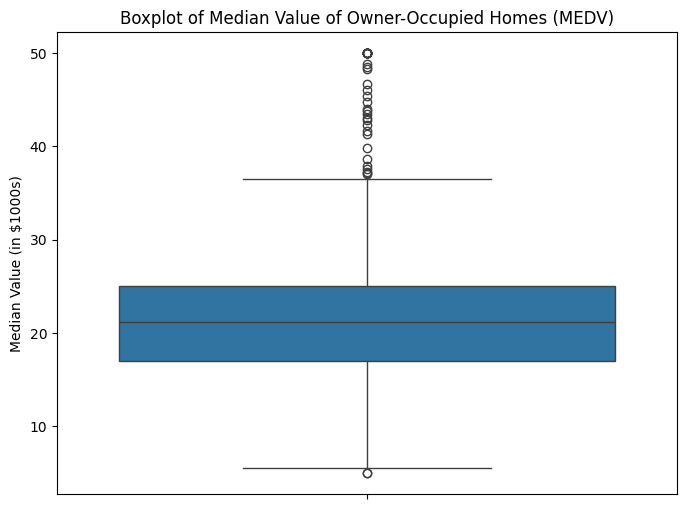

In [45]:
# Boxplot for MEDV
# Create a boxplot for the MEDV variable
pyplot.figure(figsize=(8,6))
sns.boxplot(y=boston_df['MEDV'])
# Add title and label
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('Median Value (in $1000s)')
# Show the plot
pyplot.show()

# Explanation:
# - The box shows the middle 50% of the data (IQR).
# - The line in the box is the median (middle value).

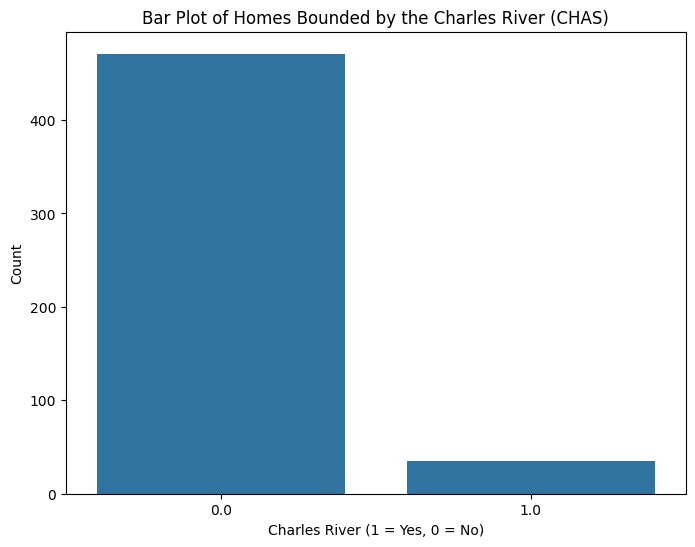

In [46]:
# Calculate counts for CHAS (0 and 1)
chas_counts = boston_df['CHAS'].value_counts().reset_index()
chas_counts.columns = ['CHAS', 'Count']

# Bar plot for CHAS
pyplot.figure(figsize=(8,6))
sns.barplot(x='CHAS', y='Count', data=chas_counts)

# Add title and axis labels
pyplot.title('Bar Plot of Homes Bounded by the Charles River (CHAS)')
pyplot.xlabel('Charles River (1 = Yes, 0 = No)')
pyplot.ylabel('Count')

# Show the plot
pyplot.show()

# Explanation:
# - The bar plot shows the number of homes near the Charles River (CHAS = 1) and those that are not (CHAS = 0).
# - The height of the bars represents the count of homes in each category.


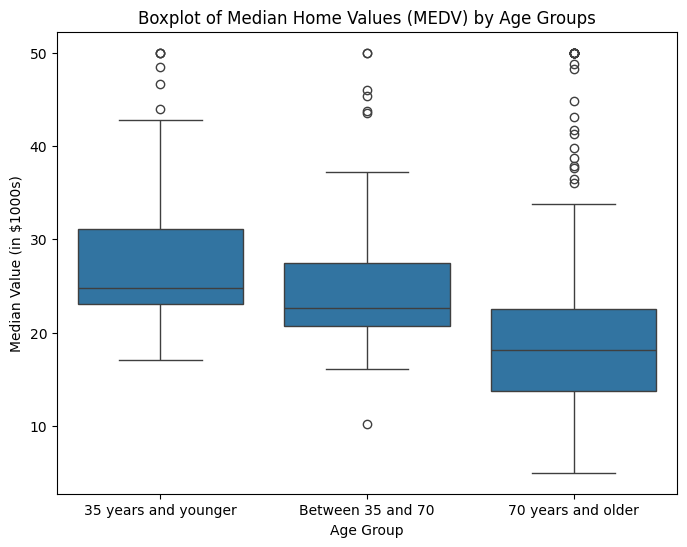

In [47]:
# Create age groups based on the AGE variable
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'Between 35 and 70', '70 years and older'])

# Boxplot for MEDV vs AGE_Group
pyplot.figure(figsize=(8,6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)

# Add title and axis labels
pyplot.title('Boxplot of Median Home Values (MEDV) by Age Groups')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value (in $1000s)')

# Show the plot
pyplot.show()

# Explanation:
# - The AGE variable is divided into three groups based on the age of homes.
# - The boxplot displays the distribution of median home values (MEDV) for each age group.
# - The box represents the middle 50% of the values, and the line inside is the median.


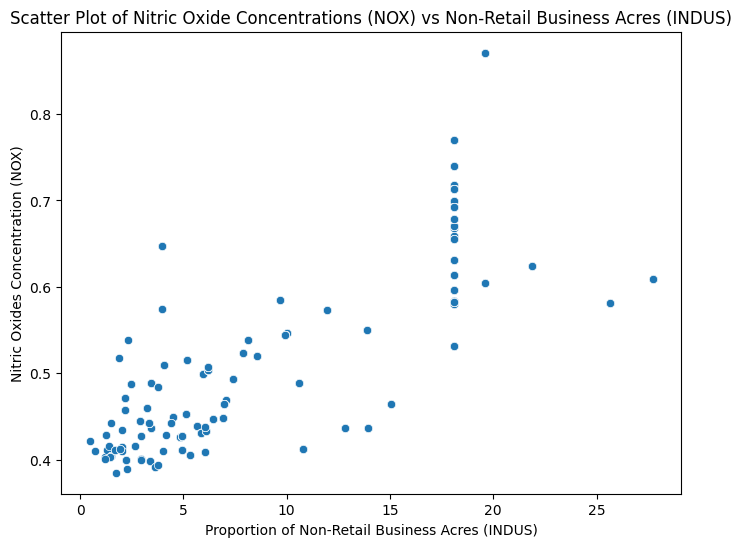

In [48]:
# Scatter plot for NOX vs INDUS
pyplot.figure(figsize=(8,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

# Add title and axis labels
pyplot.title('Scatter Plot of Nitric Oxide Concentrations (NOX) vs Non-Retail Business Acres (INDUS)')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxides Concentration (NOX)')

# Show the plot
pyplot.show()

# Explanation:
# - This scatter plot shows the relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).
# - Each point represents a data observation, with the x-axis showing INDUS and the y-axis showing NOX.
# - A visible trend can indicate if there's a correlation between business activity and pollution levels.


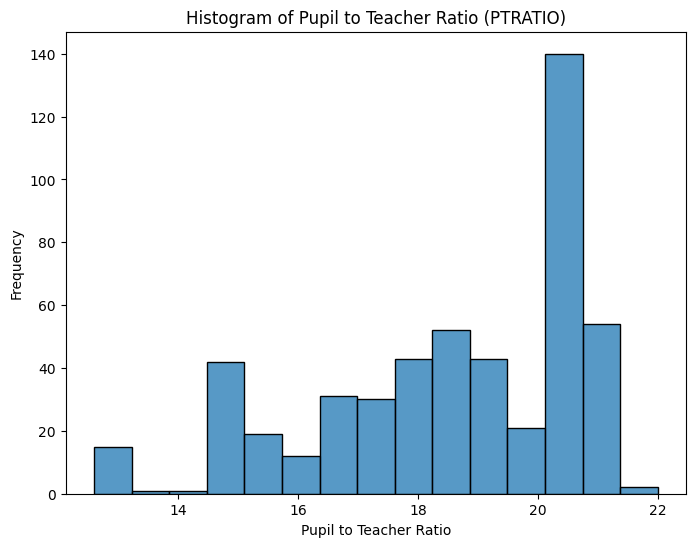

In [49]:
# Histogram for PTRATIO
pyplot.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=False)

# Add title and axis labels
pyplot.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')

# Show the plot
pyplot.show()

# Explanation:
# - This histogram displays the distribution of the pupil-to-teacher ratio (PTRATIO).
# - The x-axis represents the different ratios, while the y-axis shows the frequency of those ratios in the dataset.
# - It helps to visualize how pupil-teacher ratios are distributed across different schools or districts.
